# Project Review

## Main goal of the project

This project is about predicting whether a customer will change telecommunications provider, something known as "churning".

## File descriptions

- train.csv - the training set.
<br>Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes

- test.csv - the test set.
<br>Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").

## Data fields (features)

- state, string. 2-letter code of the US state of customer residence
- account_length, numerical. Number of months the customer has been with the current telco provider
- area_code, string="area_code_AAA" where AAA = 3 digit area code.
- international_plan, (yes/no). The customer has international plan.
- voice_mail_plan, (yes/no). The customer has voice mail plan.
- number_vmail_messages, numerical. Number of voice-mail messages.
- total_day_minutes, numerical. Total minutes of day calls.
- total_day_calls, numerical. Total number of day calls.
- total_day_charge, numerical. Total charge of day calls.
- total_eve_minutes, numerical. Total minutes of evening calls.
- total_eve_calls, numerical. Total number of evening calls.
- total_eve_charge, numerical. Total charge of evening calls.
- total_night_minutes, numerical. Total minutes of night calls.
- total_night_calls, numerical. Total number of night calls.
- total_night_charge, numerical. Total charge of night calls.
- total_intl_minutes, numerical. Total minutes of international calls.
- total_intl_calls, numerical. Total number of international calls.
- total_intl_charge, numerical. Total charge of international calls
- number_customer_service_calls, numerical. Number of calls to customer service
- churn, (yes/no). Customer churn - target variable.

# Work with the data

### Initial imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(59)
# set the max columns to none
pd.set_option('display.max_columns', None)

In [2]:
# %load_ext pycodestyle_magic
# %pycodestyle_on

In [3]:
train_path = 'data\\train.csv'
df = pd.read_csv(train_path)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## EDA

### General

In [4]:
print('Size of train', df.shape)

Size of train (4250, 20)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [6]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Check missing values

In [7]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

### Target `churn`

In [8]:
print('Target distribution:')
print(df.churn.value_counts(normalize=True))

Target distribution:
no     0.859294
yes    0.140706
Name: churn, dtype: float64


Only 14.1% of customers are churn

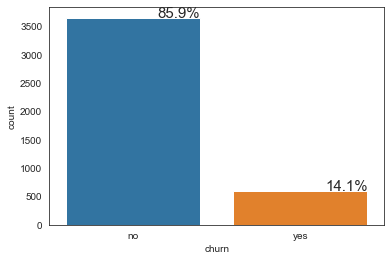

In [9]:
sns.set_style('white')
ax = sns.countplot(x='churn', data=df)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

### Feature `state`

In [10]:
df.state.unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [11]:
len(df.state.unique())

51

There are 51 different states. It won't be good in the future to label encode all of them as it makes no sense with states. We will need to perform one hot encoding. And as we have so many states we have to somehow keep only important ones. Possible approach is to keep those states, where there are the most churn customers and to label other states as `Other`. Top 5 important states are enough.

It is more important to keep states where there are the biggest churn, that's why it makes sense to sort by churn

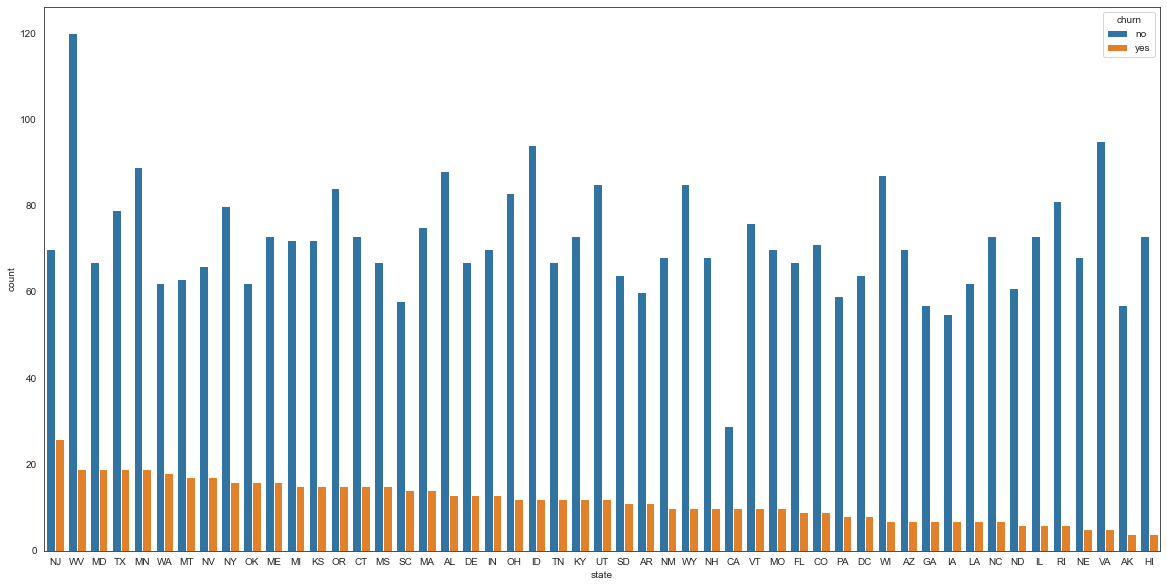

In [12]:
sns.set_style('white')
plt.figure(figsize=(20, 10))

sns.countplot(x='state', hue='churn', data=df,
              order=df[df['churn'] == 'yes']['state'].value_counts().index)
plt.show()

So our primary states are:
- NJ
- WV
- MD
- TX
- MN
Other will be labeled as `other`

### Feature `area_code`

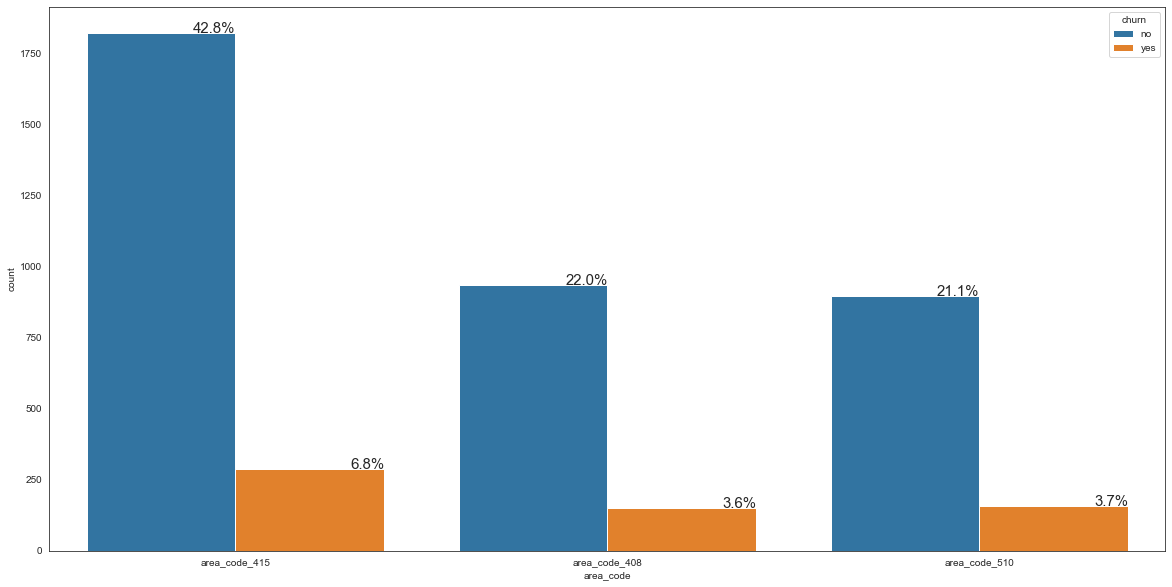

In [13]:
sns.set_style('white')
plt.figure(figsize=(20, 10))

ax = sns.countplot(x='area_code', hue='churn', data=df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

Several conclusions:
- About 50% of all customers are in area_code_415
- area_code_408 and area_code_510 are almost identical. We could label them the same way.

In [14]:
df.area_code.value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

### Features `international_plan` and `voice_mail_plan`

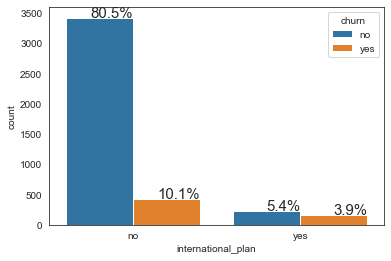

In [15]:
sns.set_style('white')
ax = sns.countplot(x='international_plan', hue='churn',
                   hue_order=['no', 'yes'], data=df,
                   order=df['international_plan'].value_counts().index)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

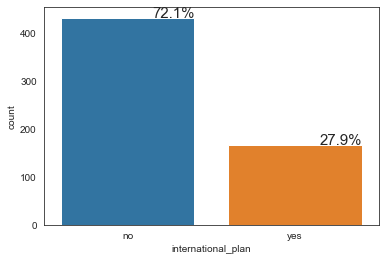

In [16]:
sns.set_style('white')
ax = sns.countplot(x='international_plan', data=df[df['churn'] == 'yes'],
                   order=df['international_plan'].value_counts().index)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df[df['churn'] == 'yes']))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)
    
plt.show()

About 28% of all churn customers use international plan (3.9% of all customers). And there is only 9.3% customers who use international plan.

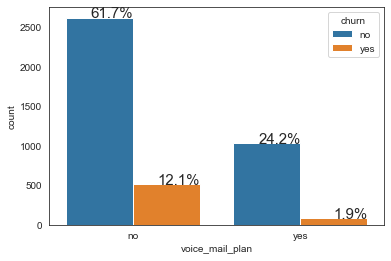

In [17]:
sns.set_style('white')
ax = sns.countplot(x='voice_mail_plan', hue='churn',
                   hue_order=['no', 'yes'], data=df,
                   order=df['voice_mail_plan'].value_counts().index)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

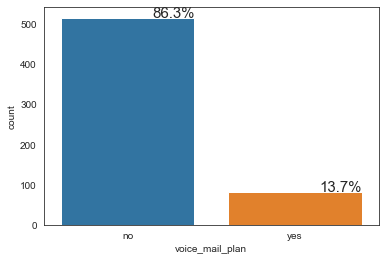

In [18]:
sns.set_style('white')
ax = sns.countplot(x='voice_mail_plan', data=df[df['churn'] == 'yes'],
                   order=df['voice_mail_plan'].value_counts().index)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df[df['churn'] == 'yes']))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)
    
plt.show()

About 13.7% of all churn customers use voice_mail plan (1.9% of all customers). And there is 26.1% customers who use voice_mail plan.

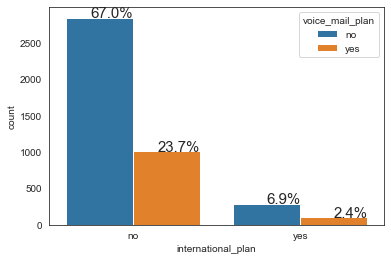

In [19]:
sns.set_style('white')
ax = sns.countplot(x='international_plan', hue='voice_mail_plan',
                   hue_order=['no', 'yes'], data=df,
                   order=df['international_plan'].value_counts().index)

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / len(df))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

67% of customers do not use nor international plan nor voice_mail plan. Only 2.4% of customers use both.

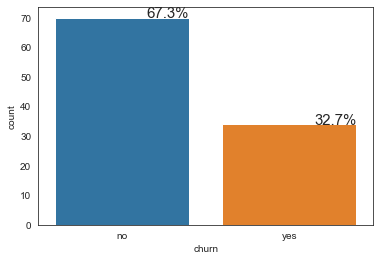

In [20]:
sns.set_style('white')
ax = sns.countplot(x='churn', order=df['churn'].value_counts().index,
                   data=df[(df['voice_mail_plan'] == 'yes') &
                           (df['international_plan'] == 'yes')])

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /
                                  len(df[(df['voice_mail_plan'] == 'yes') &
                                         (df['international_plan'] == 'yes')]))
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='right', fontsize=15)

plt.show()

32.7% (almost a third) of customers who use both international plan and voice_mail plan are churn

### Feature `number_vmail_messages` (only for those customers who use voice_mail plan)

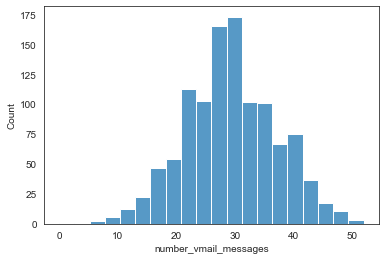

In [21]:
sns.set_style('white')
sns.histplot(x='number_vmail_messages',
             data=df[df['voice_mail_plan'] == 'yes'],
             bins=20)
plt.show()

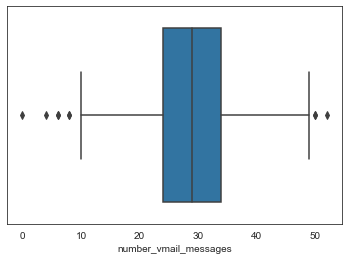

In [22]:
sns.set_style('white')
sns.boxplot(x='number_vmail_messages',
            data=df[df['voice_mail_plan'] == 'yes'])
plt.show()

There are several outliers in `number_vmail_messages`. They are not so critical. For example there is one person who uses `voice_mail_plan` and has 0 messages.

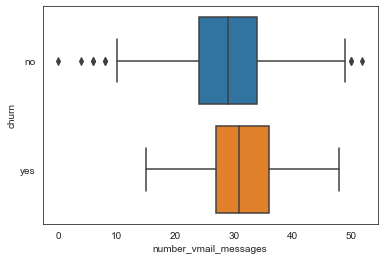

In [23]:
sns.set_style('white')
sns.boxplot(x='number_vmail_messages',
            data=df[df['voice_mail_plan'] == 'yes'],
            y='churn')
plt.show()

In [24]:
print(df.shape)
mask_vm_true = (df.voice_mail_plan == 'yes')
mask_vm_outlier = ((df.number_vmail_messages > 50) | (df.number_vmail_messages < 10))
df = df.drop(df[mask_vm_true & mask_vm_outlier].index)
print(df.shape)

(4250, 20)
(4243, 20)


Outliers are present only in non-churn customers. We have to remove them, so as an outlier we expect `number_vmail_messages` to be less than 10 or more than 50 for people who have `voice_mail_plan`

### Feature `number_customer_service_calls`

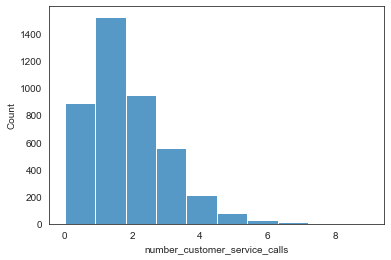

In [25]:
sns.set_style('white')
sns.histplot(x='number_customer_service_calls', data=df, bins=10)
plt.show()

Right-skewed

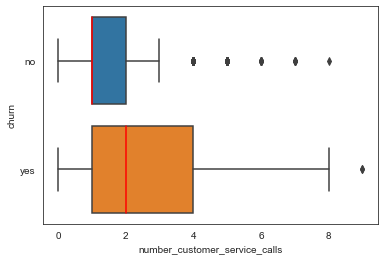

In [26]:
sns.set_style('white')
sns.boxplot(x='number_customer_service_calls', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

We can see that for churn people it is standard to have more than one service call, however for non-churn it is typical to have one (medians). Also more than 3 calls are outliers for non-churn customers, what can not be said about churn.

We will consider 5 or more calls for non-churn customers as outliers and remove them

In [38]:
print(df.shape)
mask_ch_true = (df.churn == 'no')
mask_ch_outlier = (df.number_customer_service_calls >= 5)
df = df.drop(df[mask_ch_true & mask_ch_outlier].index)
print(df.shape)

(4243, 14)
(4195, 14)


### `total_day` minutes/calls/charge

Since we are going to transform day/eve/night features into one new `total` feature, it is important to look at the outliers and distribution itself.

In [27]:
feature_types = ['minutes', 'calls', 'charge']
for feature in feature_types:
    df['total_' + feature] = df['total_day_' + feature] + \
        df['total_eve_' + feature] + \
        df['total_night_' + feature]

    df.drop(['total_day_' + feature,
             'total_eve_' + feature,
             'total_night_' + feature],
            axis=1, inplace=True)
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,OH,107,area_code_415,no,yes,26,13.7,3,3.70,1,no,611.5,329,55.54
1,NJ,137,area_code_415,no,no,0,12.2,5,3.29,0,no,527.2,328,59.00
2,OH,84,area_code_408,yes,no,0,6.6,7,1.78,2,no,558.2,248,65.02
3,OK,75,area_code_415,yes,no,0,10.1,3,2.73,3,no,501.9,356,49.36
4,MA,121,area_code_510,no,yes,24,7.5,7,2.03,3,no,779.3,314,76.28


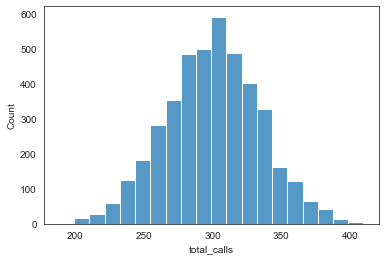

In [28]:
sns.set_style('white')
sns.histplot(x='total_calls', data=df, bins=20)
plt.show()

Normal distribution, no transformation is needed

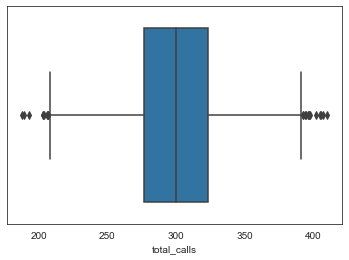

In [29]:
sns.set_style('white')
sns.boxplot(x='total_calls', data=df)
plt.show()

No critical outliers

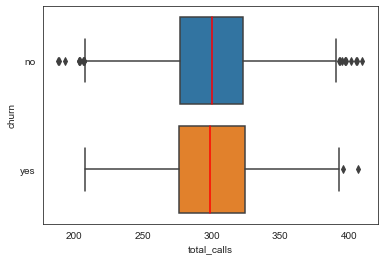

In [30]:
sns.set_style('white')
sns.boxplot(x='total_calls', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

Everything almost the same

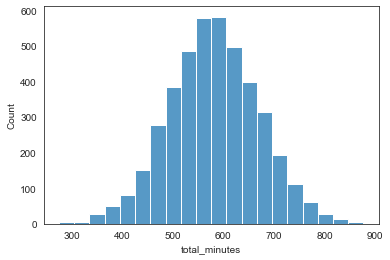

In [31]:
sns.set_style('white')
sns.histplot(x='total_minutes', data=df, bins=20)
plt.show()

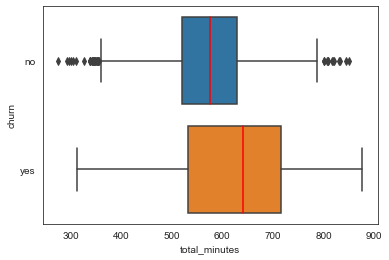

In [32]:
sns.set_style('white')
sns.boxplot(x='total_minutes', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

But here is something interesting, churn customers have more total_minutes in general. Let's see, is there also difference in international calls

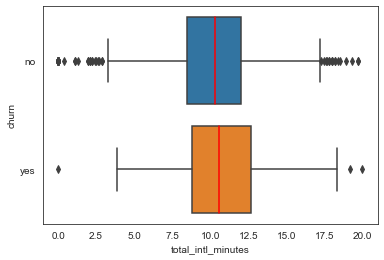

In [33]:
sns.set_style('white')
sns.boxplot(x='total_intl_minutes', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

Here they are the same

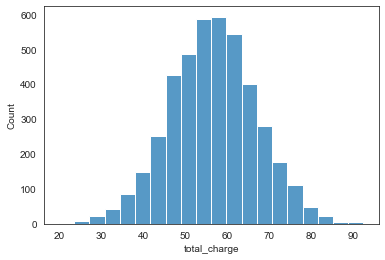

In [34]:
sns.set_style('white')
sns.histplot(x='total_charge', data=df, bins=20)
plt.show()

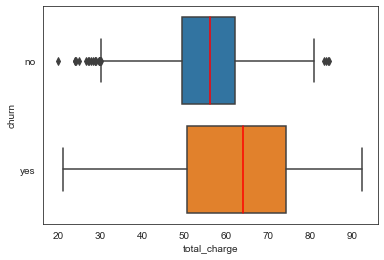

In [35]:
sns.set_style('white')
sns.boxplot(x='total_charge', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

Again, as for the total minutes, total charge of churn customers is in general more than non churn.

### `account_length`

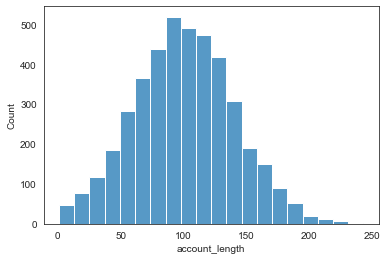

In [36]:
sns.set_style('white')
sns.histplot(x='account_length', data=df, bins=20)
plt.show()

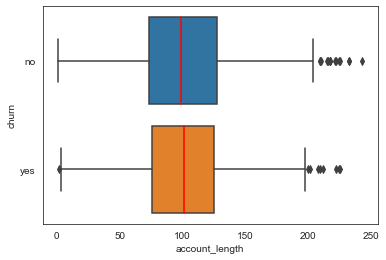

In [37]:
sns.set_style('white')
sns.boxplot(x='account_length', data=df, y='churn',
            medianprops=dict(color="red", label='median'))
plt.show()

Nothing interesting, almost the same

### Data preprocessing

That's it for analysis and there are some ideas that we try with our data:
- First of all convertations of all non-numeric features:
    1. Convert string values to the numerical values in binary columns
    2. Convert categorical features ```state``` and ```area_code```:
        - ```state``` will be converted using only top 5 churn states
        - ```area_code``` has small length and will be converted fully
        - Both features will be converted using One Hot Encoding
- Secondly it is logical to calculate total daily features of charge, calls and minutes
- Thirdly it is important to transform non-normal distributions into normal
- At last scale everything. For our strong baseline it is important, that all features will be the same scale.